<a href="https://colab.research.google.com/github/leompinheiro/AnaliseDeSeriesTemporais/blob/main/AtividadeDissertativa_AnaliseSeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar pacotes e configurações gerais**

In [707]:
#--- Importar pacotes
import pandas as pd
import yfinance as yf
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error



#--- ignorar warnings
warnings.filterwarnings("ignore")

#--- Configurar padrões para exibição dos gráficos
plt.style.use('seaborn')
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['lines.linestyle'] = 'solid'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'black'



# **Exercício 01:**
- Obter os dados financeiros sobre a criptomoeda BITCOIN ("BTC-USD") do período de dezembro de 2021 a janeiro de 2022

In [708]:
#--- Importar dados financeiros
papel = "BTC-USD"
inicio = "2021-12-01"
final = "2022-01-31"
cotacaohistorica = yf.download(papel, start=inicio, end=final)

#--- Exibe dados importados
display(cotacaohistorica)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307
2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686
2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215
2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469
2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161
...,...,...,...,...,...,...
2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629
2022-01-28,37128.445312,37952.878906,36211.109375,37784.332031,37784.332031,22238830523


In [709]:
#--- Monta dataframe de trabalho com as colunas que serão utilizadas no modelo, eliminando valores nulos
df = cotacaohistorica.drop(["Open","High","Low","Adj Close","Volume"], axis=1, inplace=False).dropna()
#df['Date'] = df.index
#--- Exibe dataframe de trabalho
display(df)

,Close
Date,
2021-12-01,57229.828125
2021-12-02,56477.816406
2021-12-03,53598.246094
2021-12-04,49200.703125
2021-12-05,49368.847656
...,...
2022-01-26,36852.121094
2022-01-27,37138.234375
2022-01-28,37784.332031


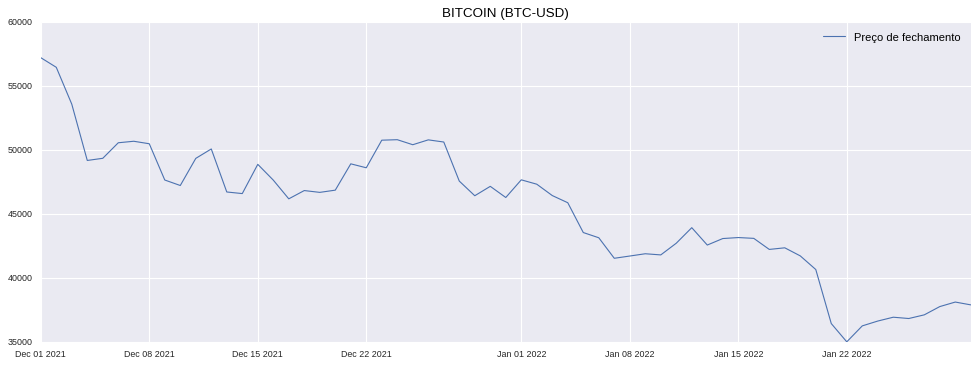

In [710]:
#--- Exibe os preços de fechamento
plt.plot(df['Close'], label='Preço de fechamento')
plt.title('BITCOIN (BTC-USD)')
plt.legend(loc='best')
plt.show()

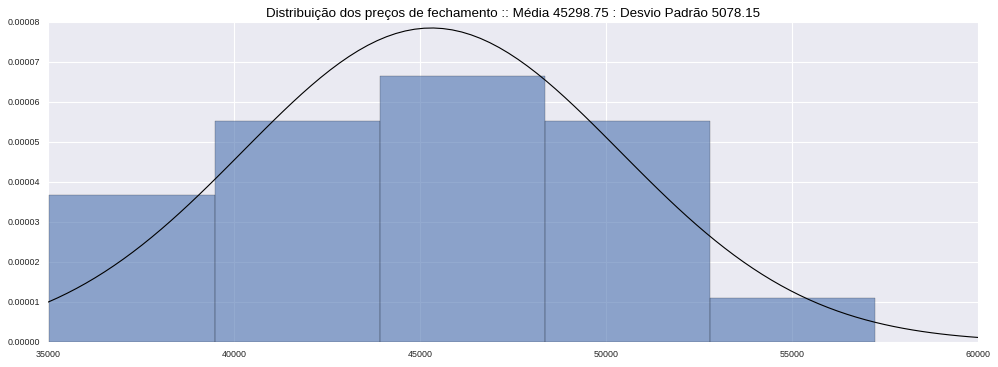

In [711]:
#--- Exibe a distribuição dos preços de fechamento
mu, std = norm.fit(df['Close'])
plt.hist(df['Close'], bins=5, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, color='black')
title = "Distribuição dos preços de fechamento :: Média {:.2f} : Desvio Padrão {:.2f}".format(mu, std)
plt.title(title)
plt.show()

# **Exercício 02**
- Fazer as decomposições aditiva e multiplicativa da série

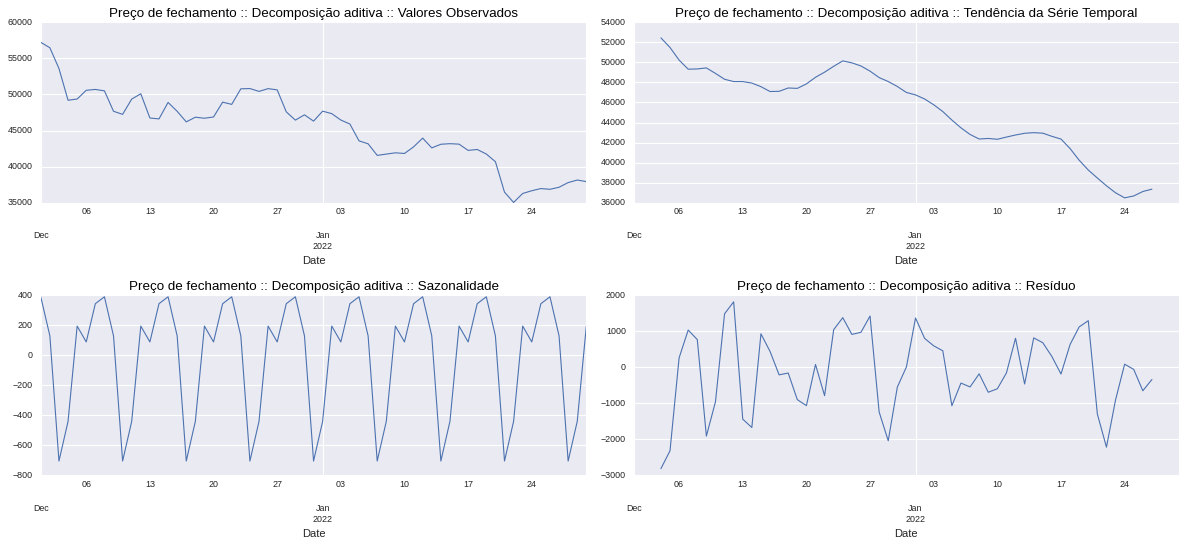

In [712]:
#--- Decomposição aditiva
decom = sm.tsa.seasonal_decompose(x=df['Close'],  model='additive')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,7))
decom.observed.plot(ax=ax1, title = 'Preço de fechamento :: Decomposição aditiva :: Valores Observados')
decom.trend.plot(ax=ax2, title = 'Preço de fechamento :: Decomposição aditiva :: Tendência da Série Temporal')
decom.seasonal.plot(ax=ax3, title = 'Preço de fechamento :: Decomposição aditiva :: Sazonalidade')
decom.resid.plot(ax=ax4, title = 'Preço de fechamento :: Decomposição aditiva :: Resíduo')
plt.tight_layout()

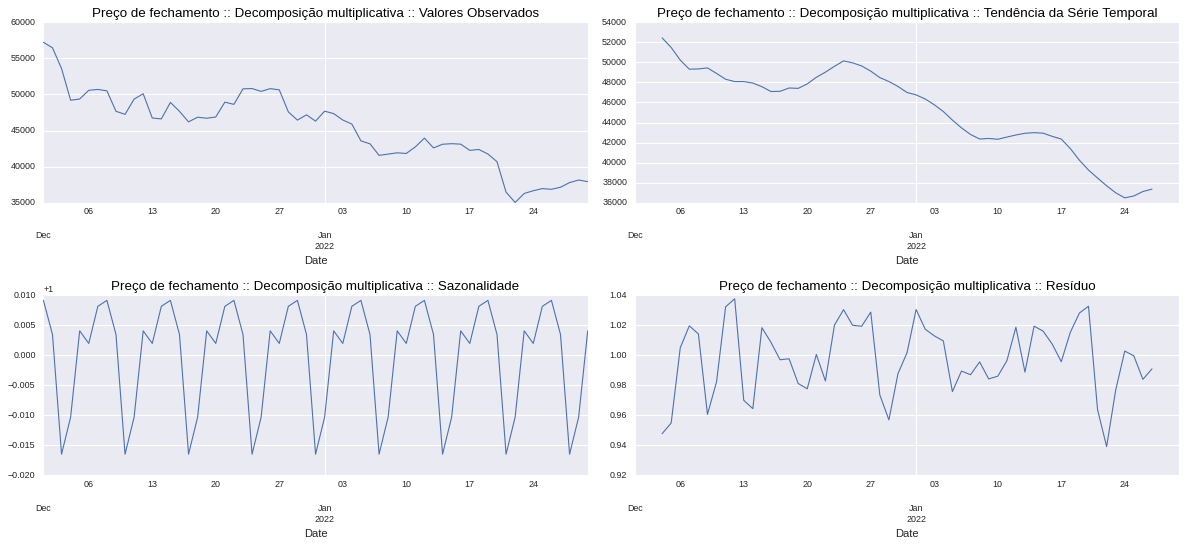

In [713]:
#--- Decomposição multiplicativa
decom = sm.tsa.seasonal_decompose(x=df['Close'],  model='multiplicative')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,7))
decom.observed.plot(ax=ax1, title = 'Preço de fechamento :: Decomposição multiplicativa :: Valores Observados')
decom.trend.plot(ax=ax2, title = 'Preço de fechamento :: Decomposição multiplicativa :: Tendência da Série Temporal')
decom.seasonal.plot(ax=ax3, title = 'Preço de fechamento :: Decomposição multiplicativa :: Sazonalidade')
decom.resid.plot(ax=ax4, title = 'Preço de fechamento :: Decomposição multiplicativa :: Resíduo')
plt.tight_layout()

# **Exercício 03**
- Aplicar o modelo de médias móveis (suavização) para estudar o comportamento da série no período informado
- Imprimir os gráfico: real x suavização

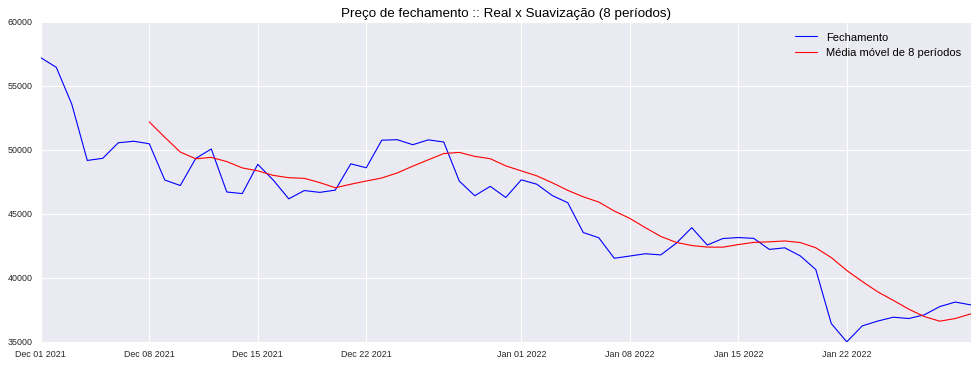

In [714]:
#--- Cálculo da média móvel de 8 períodos

df['sma8'] = df['Close'].rolling(8).mean()
plt.plot(df['Close'], color='blue',label='Fechamento')
plt.plot(df['sma8'], color='red',label='Média móvel de 8 períodos')
plt.legend(loc='best')
plt.title("Preço de fechamento :: Real x Suavização (8 períodos)")
plt.show()

# **Exercício 04**
- Aplicar ARIMA para tentar capturar o comportamento da série
- Divida a série em 70% dos dados para treinamento e 30% para teste
- Faça um gráfico: Real x Estimado

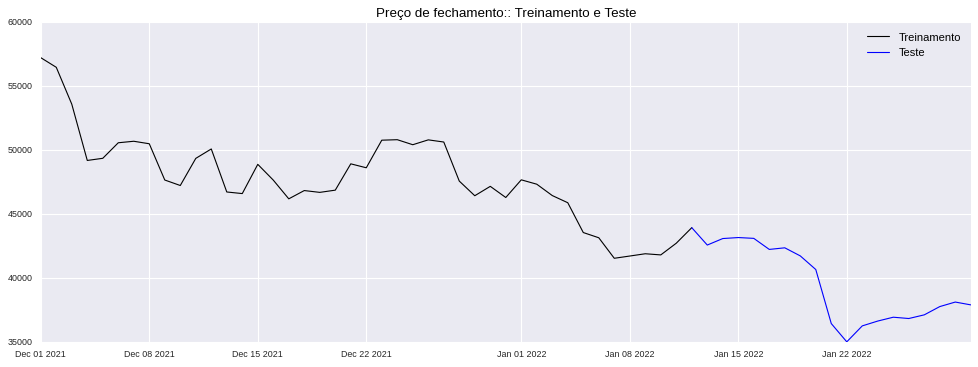

In [715]:
#--- Construção dos dataframes
i = int(df.shape[0] * 0.7)
x_treino = df['Close'][:i+1]
x_teste = df['Close'][i:]

#--- Exibir Gráfico dos valores de fechamento
plt.plot(x_treino, color='black',label='Treinamento')
plt.plot(x_teste, color='blue',label='Teste')
plt.title("Preço de fechamento:: Treinamento e Teste")
plt.legend(loc='best')
plt.show()

In [716]:
#--- Treinamento e previsão utilizando o modelo Arima
treino = [x for x in x_treino]
teste = [x for x in x_teste]
historico = treino
modelo_preditivo = []
N_observacoes_teste = len(teste)
for ponto_de_teste in range(N_observacoes_teste):
  modelo = ARIMA(historico, order=(7,1,1)  )
  modelo_fit = modelo.fit()
  saida = modelo_fit.forecast()
  yhat = saida[0]
  modelo_preditivo.append(yhat)
  valor_real_teste = teste[ponto_de_teste]
  historico.append(valor_real_teste)
  print('Valor predito=%.3f, Valor esperado=%3.f' % (yhat, valor_real_teste))

#--- Exibir MSE
erroMSE = np.sqrt(mean_squared_error(teste, modelo_preditivo))
print('RMSE é {}'.format(erroMSE))

Valor predito=43982.244, Valor esperado=43949
Valor predito=43886.848, Valor esperado=42592
Valor predito=42593.692, Valor esperado=43100
Valor predito=43290.067, Valor esperado=43177
Valor predito=43349.859, Valor esperado=43114
Valor predito=43072.268, Valor esperado=42251
Valor predito=42242.395, Valor esperado=42376
Valor predito=42469.392, Valor esperado=41744
Valor predito=41889.482, Valor esperado=40680
Valor predito=40788.849, Valor esperado=36457
Valor predito=36740.035, Valor esperado=35030
Valor predito=35559.360, Valor esperado=36277
Valor predito=36882.196, Valor esperado=36654
Valor predito=36747.169, Valor esperado=36954
Valor predito=36815.219, Valor esperado=36852
Valor predito=36897.345, Valor esperado=37138
Valor predito=37329.995, Valor esperado=37784
Valor predito=37936.672, Valor esperado=38138
Valor predito=38139.992, Valor esperado=37918
RMSE é 1199.4435743230915


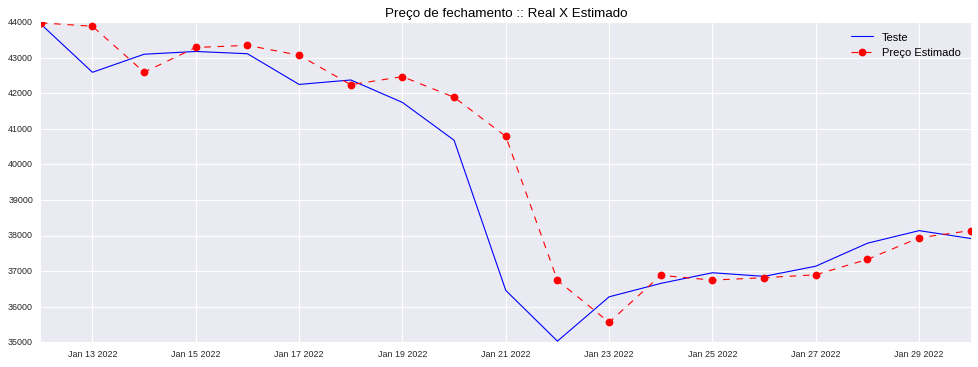

In [717]:
#--- Exibir Gráfico dos valores de fechamento reais e suas previsões para o período de testes
int_teste = x_teste.index
#plt.plot(x_treino, color='black',label='Treinamento')
plt.plot(int_teste, x_teste, color='blue',label='Teste')
plt.plot(int_teste, modelo_preditivo,
         color='red',
         marker='o',
         linestyle='dashed',
         label='Preço Estimado')
plt.title("Preço de fechamento :: Real X Estimado")
plt.legend(loc='best')
plt.show()
